# A quick tour

## Load Compute

In [3]:
import evaluate

accuracy = evaluate.load("accuracy")
print(accuracy.description)
print(accuracy.features)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative

{'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}


## Using add() and add_batch()

In [8]:
for ref, pred in zip([0, 1, 0, 1], [1, 0, 0, 1]):
    accuracy.add(references=ref, predictions=pred)
accuracy.compute()

{'accuracy': 0.5}

In [9]:
for refs, preds in zip([[0, 1], [0, 1]], [[1, 0], [0, 1]]):
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()

{'accuracy': 0.5}

## Combining several evaluations

In [7]:
clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'precision': 1.0,
 'recall': 0.5}

In [16]:
seqeval = evaluate.load('seqeval', average='micro')
predictions = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
references = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
results = seqeval.compute(predictions=predictions, references=references)
results

{'MISC': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 1},
 'PER': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 0.5,
 'overall_recall': 0.5,
 'overall_f1': 0.5,
 'overall_accuracy': 0.8}

In [21]:
from seqeval.metrics import classification_report

y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



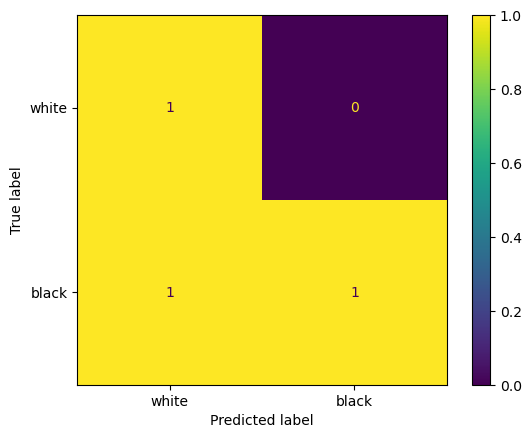

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = [0, 1, 0]
references = [0, 1, 1]
labels = ["white", "black"]
cm = confusion_matrix(references, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

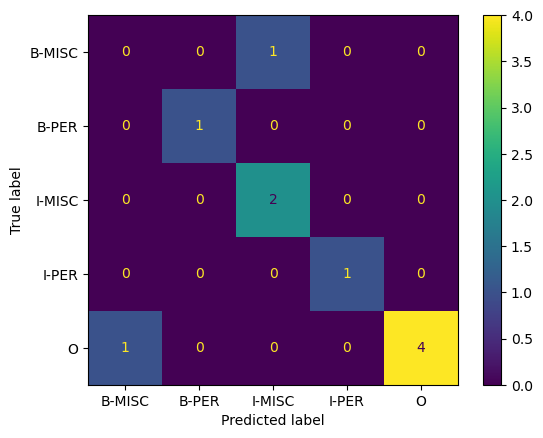

In [26]:
y_true = ['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O', 'B-PER', 'I-PER', 'O']
y_pred = ['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O', 'B-PER', 'I-PER', 'O']
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()